In [1]:
#importing sklearn packages:

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Importing statsmodels  modules  
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/czian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Uploading data wrangled in the 'concat' notebook 
import pandas as pd
demo = pd.read_pickle("Demographics_concat")

In [3]:
demo.drop(columns=['Serious crime rate, property (per 1,000 residents)'],inplace=True)

In [4]:
cols = list(demo.columns)
lst=[]
for char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    lst.append('{}1'.format(char))
    lst.append('{}2'.format(char))
    if len(lst)>76:
        break
    lst.append('{}3'.format(char))

In [5]:

demo['Year']=demo.Year.astype(int)

In [6]:

cols_=list(zip(lst,cols))

In [7]:

dict1={}
dict1['abbr']=[]
dict1['desc']=[]

for col in cols_:
    dict1['abbr'].append(col[0])
    dict1['desc'].append(col[1])
df3= pd.DataFrame(dict1)
df3

,abbr,desc
0,A1,"Serious crime rate, violent (per 1,000 residents)"
1,A2,Born in New York State
2,A3,Population aged 65+
3,B1,Racial diversity index
4,B2,Population aged 25+ with a bachelor's degree o...
5,B3,Mean travel time to work (minutes)
6,C1,"Poverty rate, population aged 65+"
7,C2,Car-free commute (% of commuters)
8,C3,Labor force participation rate
9,D1,Households with children under 18 years old


In [8]:
rename_dict={}
for no,el in cols_:
    rename_dict[el]=no
dc3=demo.rename(columns=rename_dict)

In [9]:

# creating dummy variables for categorical variable 'Borough' 
dc3=pd.get_dummies(dc3,drop_first=True)
dc3.rename(columns={'H2_STATEN ISLAND':'H2_STATEN_ISLAND'},inplace=True)

In [10]:
# selecting X, y data (F3 and B3 are crime variables)
X=dc3.drop(columns=['A1','F2'])
y=dc3[['A1']]

In [11]:
string = 'A2+A3+B1+B2+B3+C1+C2+C3+D1+D2+D3+E1+E2+E3+F1+F3+G1+G2+G3+H1+H2_BROOKLYN+H2_MANHATTAN+H2_QUEENS+H2_STATEN_ISLAND+H3+I1'

In [12]:
dc3

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,G1,G2,G3,H1,H3,I1,H2_BROOKLYN,H2_MANHATTAN,H2_QUEENS,H2_STATEN_ISLAND
0,9.4,0.455,0.077,0.46,0.140,41.6,0.322,0.789,0.590,0.428,...,0.268,123871.0,0.0710,0.703,2006,0.206,1,0,0,0
1,3.5,0.665,0.105,0.70,0.240,42.4,0.161,0.452,0.619,0.384,...,0.285,168395.0,0.0565,0.268,2006,0.222,0,0,0,1
2,1.0,0.678,0.139,0.41,0.297,38.2,0.109,0.344,0.614,0.369,...,0.192,133736.0,0.0727,0.080,2006,0.045,0,0,0,1
3,0.5,0.818,0.113,0.28,0.272,45.8,0.067,0.284,0.620,0.404,...,0.165,175246.0,0.0365,0.088,2006,0.009,0,0,0,1
4,2.9,0.460,0.152,0.73,0.361,40.3,0.099,0.477,0.631,0.320,...,0.291,147374.0,0.0641,0.194,2006,0.110,0,0,1,0
5,3.8,0.443,0.089,0.74,0.236,42.7,0.131,0.623,0.662,0.413,...,0.202,138679.0,0.0759,0.383,2006,0.091,0,0,1,0
6,7.2,0.436,0.102,0.41,0.188,42.3,0.184,0.785,0.636,0.347,...,0.315,110333.0,0.1131,0.084,2006,0.748,1,0,0,0
7,5.6,0.388,0.098,0.45,0.763,26.1,0.234,0.845,0.755,0.139,...,0.514,147198.0,0.0477,0.049,2006,0.027,0,1,0,0
8,11.4,0.644,0.094,0.51,0.169,40.0,0.292,0.748,0.574,0.405,...,0.330,132087.0,0.1279,0.185,2006,0.670,1,0,0,0
9,4.7,0.376,0.137,0.72,0.363,30.3,0.382,0.861,0.601,0.183,...,0.474,178669.0,0.0752,0.214,2006,0.097,0,1,0,0


In [13]:
#Regression model before eliminating the outliers.
m5 = ols("A1~"+string,dc3).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     16.63
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           7.48e-32
Time:                        15:49:32   Log-Likelihood:                -323.39
No. Observations:                 174   AIC:                             700.8
Df Residuals:                     147   BIC:                             786.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -104.7692     95.366  

In [14]:
#examination of outliers and high leverage points
import matplotlib.pyplot as plt


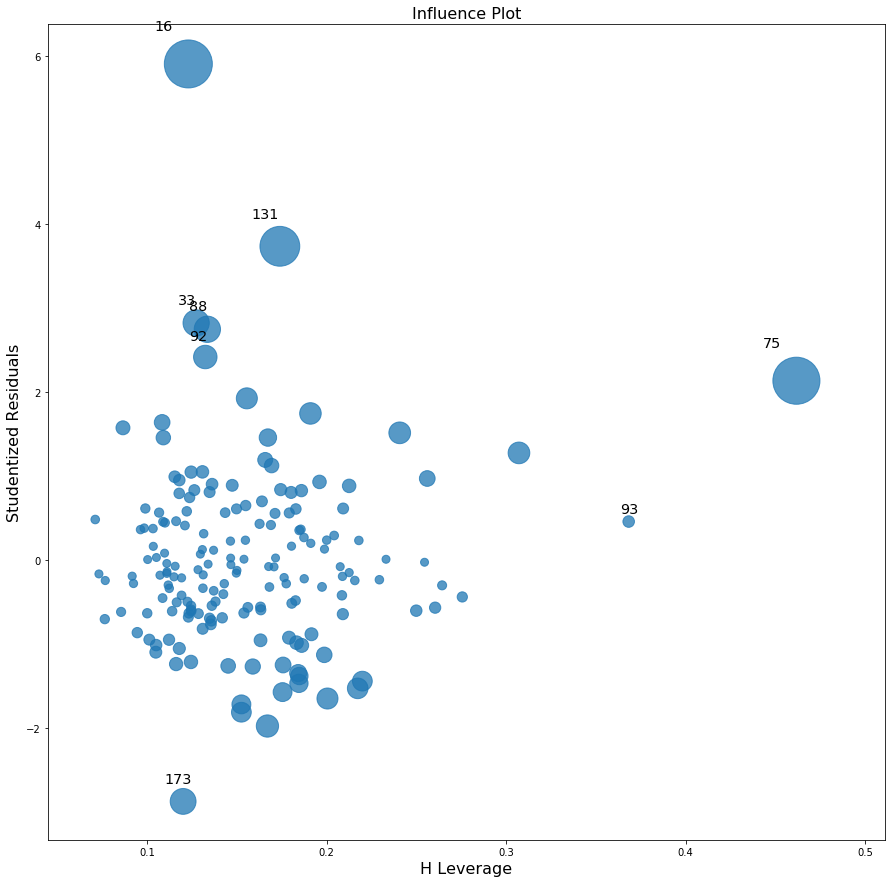

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
fig=sm.graphics.influence_plot(m5, ax=ax)

In [27]:
dc3=dc3.drop(index=[16,75])

In [17]:

#Regression model before eliminating the outliers.
m5 = ols('A1~'+string,dc3).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     20.43
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           2.34e-36
Time:                        18:26:24   Log-Likelihood:                -298.48
No. Observations:                 172   AIC:                             651.0
Df Residuals:                     145   BIC:                             735.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -124.8701     84.629  

In [18]:
finalp = string.split('+')
X=dc3[finalp]
y=dc3['A1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf = LinearRegression()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

Training accuracy: 0.7730180766089318
Testing accuracy: 0.7302355826482549


In [19]:
cv_results = cross_val_score(clf, X, y, cv=10)
print(cv_results)
R_2=np.mean(cv_results)
print('Mean CV:',R_2)
k = len(X.columns)
n = 174
Radj = 1-(((1-R_2)*(n-1))/(n-k-1))
print('Mean CV(Adjusted):',Radj)

[0.57051541 0.71220434 0.69319373 0.58541266 0.70958319 0.64387127
 0.86978719 0.42230597 0.71431676 0.60330519]
Mean CV: 0.6524495695509319
Mean CV(Adjusted): 0.5909780648456546


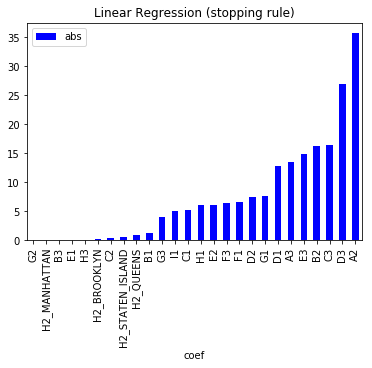

In [20]:
# the most important features
df2=pd.DataFrame(list(zip(X.columns,clf.coef_)),columns=['coef','value']).sort_values(by='value')
df2['abs']=df2.value.apply(lambda x:abs(x))
df2['sign']=df2.value.apply(lambda x: x/abs(x))
df2=df2.sort_values(by='abs')
df2.plot(x='coef',y='abs',kind='bar', color = 'blue')
plt.title('Linear Regression (stopping rule)');

In [33]:
def backward(y,X,dummy_lst,df):

    scores={} # scores dict
    X_lst=list(X.columns)
    y_='A1'
#     y_=y
    Xstring=stringf(X_lst,y_,dummy_lst)
    
    
    string = '{}~{}'.format(y_,Xstring)
    params = len(X.columns)
    for k in reversed(range(1,params+1)):
        if k == len(X.columns):
            best_score = 0 
            score = ols(string,df).fit().rsquared
            if score > best_score:
                best_score=score
                scores[k]=(Xstring,score,X_lst)
                
        else:
            best_score = 0
            for model in models(scores,k+1,y_):
               
                
                Xstring = stringf(model,y_) 
                string = '{}~{}'.format(y_,Xstring)
                
                score = ols(string,df).fit().rsquared
                if score > best_score:
                    #print(k,'best_score:',best_score,score)
                    best_score = score
                    
                    scores[k]=(Xstring,score,model)
                
            
          

    return scores

In [22]:

def stringf(lst,resp, dummy_lst=[]):
    i=0
    for col in lst:
        if not i:
            string=col
            i=1
        elif col == resp:
            continue
        elif col in dummy_lst:
            string+="+"+ 'C({})'.format(col)

        else: string+="+"+col
    return string

In [23]:
def models(scores,k,y_):
    X_lst = scores[k][2]
    models=[]
    for i in range(len(X_lst)):
        X_=X_lst[:]
        X_.pop(i)
        models.append(X_)
    return models

In [34]:
best_models=backward(y,X,[],dc3);

In [35]:

values = [v[1] for k,v in best_models.items()]
keys = [k for k in best_models.keys()]

Text(0,0.5,'R-squared')

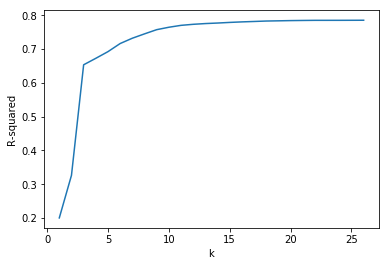

In [36]:

plt.plot(keys,values)
plt.xlabel('k')
plt.ylabel('R-squared')

In [37]:

best_string = best_models[11][0]
best_list=best_models[11][2]

In [38]:
best_models

{1: ('B2', 0.20015633071977124, ['B2']),
 2: ('B2+D3', 0.3262205083139452, ['B2', 'D3']),
 3: ('A2+B2+D3', 0.6536413261565104, ['A2', 'B2', 'D3']),
 4: ('A2+B2+C3+D3', 0.6728196419435399, ['A2', 'B2', 'C3', 'D3']),
 5: ('A2+A3+B2+C3+D3', 0.6925899182324655, ['A2', 'A3', 'B2', 'C3', 'D3']),
 6: ('A2+A3+B2+C3+D3+G1',
  0.7165798678432516,
  ['A2', 'A3', 'B2', 'C3', 'D3', 'G1']),
 7: ('A2+A3+B2+C3+D3+E3+G1',
  0.7323153561971818,
  ['A2', 'A3', 'B2', 'C3', 'D3', 'E3', 'G1']),
 8: ('A2+A3+B2+C3+D3+E3+G1+H3',
  0.7451931069502604,
  ['A2', 'A3', 'B2', 'C3', 'D3', 'E3', 'G1', 'H3']),
 9: ('A2+A3+B2+C3+D1+D3+E3+G1+H3',
  0.7576316760785038,
  ['A2', 'A3', 'B2', 'C3', 'D1', 'D3', 'E3', 'G1', 'H3']),
 10: ('A2+A3+B2+C1+C3+D1+D3+E3+G1+H3',
  0.7648086495034807,
  ['A2', 'A3', 'B2', 'C1', 'C3', 'D1', 'D3', 'E3', 'G1', 'H3']),
 11: ('A2+A3+B2+C1+C3+D1+D3+E2+E3+G1+H3',
  0.7704235467040486,
  ['A2', 'A3', 'B2', 'C1', 'C3', 'D1', 'D3', 'E2', 'E3', 'G1', 'H3']),
 12: ('A2+A3+B2+C1+C3+D1+D3+E2+E3+G1+G

In [40]:
m6 = ols('A1~'+best_string,dc3).fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     48.81
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           1.92e-45
Time:                        18:33:09   Log-Likelihood:                -304.34
No. Observations:                 172   AIC:                             632.7
Df Residuals:                     160   BIC:                             670.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -139.6687     65.742     -2.124      0.0

In [41]:
for el in cols_:
    if el[0] in best_list:
        print(el)

('A2', 'Born in New York State')
('A3', 'Population aged 65+')
('B2', "Population aged 25+ with a bachelor's degree or higher")
('C1', 'Poverty rate, population aged 65+')
('C3', 'Labor force participation rate')
('D1', 'Households with children under 18 years old')
('D3', 'Foreign-born population')
('E2', 'Percent Asian')
('E3', 'Population aged 25+ without a high school diploma')
('G1', 'Single-person households')
('H3', 'Year')


In [49]:
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
finals={}
best_score = 0
for k, model in best_models.items():
    X= dc3[model[2]]
    y=dc3[['A1']]
    clf = LinearRegression()
    cv = cross_val_score(clf,X,y, cv = 10)
    k = len(X.columns)
    n = 174
   
    bics= []
    for score in cv:
        
        Radj = 1-(((1-score)*(n-1))/(n-k-1))
        bics.append(Radj)
    final = np.mean(bics) 
    finals[k]=final
    
    if final > best_score:
        best_score=final
        best_k = k 
    print(k,np.mean(bics))
print("Best model:",best_k,best_score)

26 0.5909780648456545
25 0.6063842351641711
24 0.6171405480056507
23 0.6258989818418789
22 0.6359456420895443
21 0.6488882559972646
20 0.6557714987347226
19 0.660806622852973
18 0.6650068010335874
17 0.6689649168351127
16 0.6767348354191464
15 0.6828152798777668
14 0.6852385130935229
13 0.6879992586831697
12 0.6920242551497302
11 0.6965265317293925
10 0.6940607114850919
9 0.6913235337241144
8 0.6733148928226338
7 0.6724665851690297
6 0.6652530505506202
5 0.6387309202458052
4 0.6195666686276942
3 0.6046087980228056
2 0.19846767153328262
1 0.06833707392731356
Best model: 11 0.6965265317293925


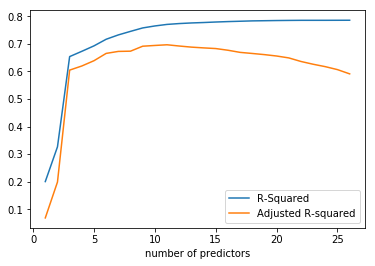

In [50]:

plt.plot(keys,values);
plt.plot([k for k,v in finals.items()],[v for k,v in finals.items()]);
plt.xlabel("number of predictors");

plt.legend(('R-Squared','Adjusted R-squared'));

In [51]:
#dc3=dc3.drop(index=[16,75])
X=dc3[best_list]
y=dc3['A1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
clf = LinearRegression()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

Training accuracy: 0.7714443632378403
Testing accuracy: 0.7416232758261251


In [52]:

#LR Cv
cv_results = cross_val_score(clf, X, y, cv=10)
print(cv_results)
R_2=np.mean(cv_results)
print('Mean CV:',R_2)
k = len(X.columns)
n = 174
Radj = 1-(((1-R_2)*(n-1))/(n-k-1))
print('Mean CV(Adjusted):',Radj)

[0.68204633 0.77456886 0.73637111 0.75241025 0.80764262 0.69966366
 0.86588431 0.45535725 0.7473304  0.63695053]
Mean CV: 0.7158225326020901
Mean CV(Adjusted): 0.6965265317293925


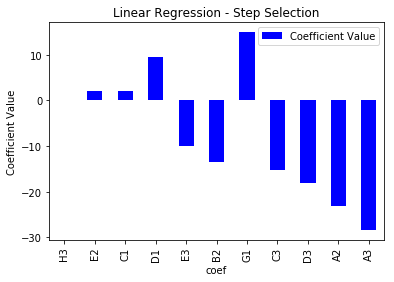

In [53]:
df2=pd.DataFrame(list(zip(X.columns,clf.coef_)),columns=['coef','value']).sort_values(by='value')
df2['abs']=df2.value.apply(lambda x:abs(x))
df2['sign']=df2.value.apply(lambda x: x/abs(x))
df2=df2.sort_values(by='abs')
df2.plot(x='coef',y='value',kind='bar', color = 'blue')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression - Step Selection');
plt.legend(['Coefficient Value']);

In [54]:
df3

,abbr,desc
0,A1,"Serious crime rate, violent (per 1,000 residents)"
1,A2,Born in New York State
2,A3,Population aged 65+
3,B1,Racial diversity index
4,B2,Population aged 25+ with a bachelor's degree o...
5,B3,Mean travel time to work (minutes)
6,C1,"Poverty rate, population aged 65+"
7,C2,Car-free commute (% of commuters)
8,C3,Labor force participation rate
9,D1,Households with children under 18 years old


In [60]:
X=dc3.drop(columns=['A1','F2'])
y=dc3[['A1']]

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

param_grid = {'alpha': [0.01,0.05,0.1,1,10,100]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=10)
lasso_cv.fit(X_,y)

print(lasso_cv.best_params_)

print(lasso_cv.best_score_)


{'alpha': 0.01}
0.6702896867365997


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2)
clf = Lasso(alpha=lasso_cv.best_params_['alpha'])
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

Training accuracy: 0.7914441366466378
Testing accuracy: 0.7093277665652192


In [63]:
#Lasso Cv
cv_results = cross_val_score(clf, X_, y, cv=10)
print(cv_results)
R_2=np.mean(cv_results)
print('Mean CV:',R_2)
k = len(clf.coef_[clf.coef_>0])

n = 174
Radj = 1-(((1-R_2)*(n-1))/(n-k-1))
print('Mean CV(Adjusted):',Radj)

[0.64916482 0.77014297 0.6790902  0.61113423 0.72144144 0.65034767
 0.88560677 0.38587656 0.70644206 0.63901907]
Mean CV: 0.6698265783615457
Mean CV(Adjusted): 0.6452173792332137


In [64]:
df1=pd.DataFrame(list(zip(X.columns,clf.coef_)),columns=['coef','value'])

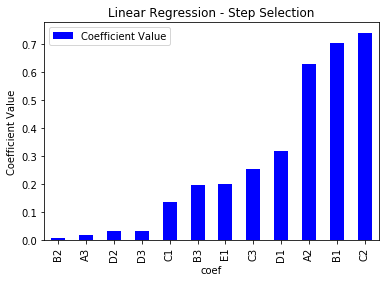

In [65]:

lasso_coef=clf.coef_[clf.coef_>0]
df1=pd.DataFrame(list(zip(X.columns,lasso_coef)),columns=['coef','value']).sort_values(by='value')
df1['abs']=df1.value.apply(lambda x:abs(x))
df1['sign']=df1.value.apply(lambda x: x/abs(x))
df1=df1.sort_values(by='abs')
df1.plot(x='coef',y='value',kind='bar', color = 'blue')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression - Step Selection');
plt.legend(['Coefficient Value'])

In [66]:

# Ridge
# Grid Search
param_grid = {'alpha': [0.01,0.05,0.1,1,10,100]}
clf = Ridge()
ridge_cv = GridSearchCV(clf, param_grid, cv=10)
ridge_cv.fit(X_,y)
ralpha= ridge_cv.best_params_['alpha']
print(ridge_cv.best_params_)

print(ridge_cv.best_score_)

#cv
clf = Ridge(alpha =ralpha)
cv_results = cross_val_score(clf, X_, y, cv=10)
k = len(X.columns)

n = 174
Radj = 1-(((1-R_2)*(n-1))/(n-k-1))
print('Mean CV(Adjusted):',Radj)



clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

{'alpha': 1}
0.6644713261146965
Mean CV(Adjusted): 0.6114285582078055
Training accuracy: 0.7910877150311542
Testing accuracy: 0.7150348189712143


In [91]:
list(X.columns)

['A2',
 'A3',
 'B1',
 'B2',
 'B3',
 'C1',
 'C2',
 'C3',
 'D1',
 'D2',
 'D3',
 'E1',
 'E2',
 'E3',
 'F1',
 'F3',
 'G1',
 'G2',
 'G3',
 'H1',
 'H3',
 'I1',
 'H2_BROOKLYN',
 'H2_MANHATTAN',
 'H2_QUEENS',
 'H2_STATEN_ISLAND']

In [139]:
import numpy as np


In [140]:

data = {'coef': X.columns,'value':np.hstack(abs(clf.coef_))}


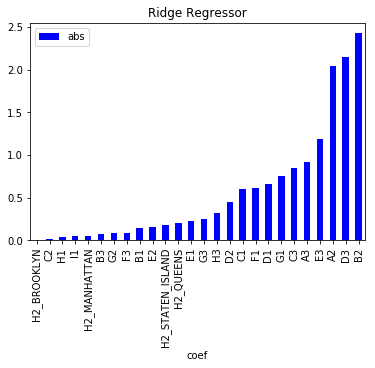

In [141]:
df2=pd.DataFrame.from_dict(data)
df2['abs']=df2.value.apply(lambda x:abs(x))
df2['sign']=df2.value.apply(lambda x: x/abs(x))
df2=df2.sort_values(by='abs')
df2.plot(x='coef',y='abs',kind='bar', color = 'blue')
plt.title('Ridge Regressor');

In [142]:
from sklearn.ensemble import RandomForestRegressor

X=dc3.drop(columns=['A1','F2'])
y=dc3[['A1']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2)


clf = RandomForestRegressor(n_estimators=200,max_depth=6)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

/home/czian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Training accuracy: 0.9433057281228661
Testing accuracy: 0.6399364598192371


In [143]:

#random forest Cv
cv_results = cross_val_score(clf, X, y, cv=10)
print(cv_results)
print('Mean CV:',np.mean(cv_results))

/home/czian/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/czian/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/czian/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/czian/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionW

[0.72410405 0.850266   0.79209237 0.7228049  0.80620569 0.60931331
 0.84533788 0.39354305 0.57736506 0.75525249]
Mean CV: 0.7076284798810527


In [144]:
imp = clf.feature_importances_
df1=pd.DataFrame(list(zip(X.columns,imp)),columns=['coef','value']).sort_values(by='value',ascending='True')

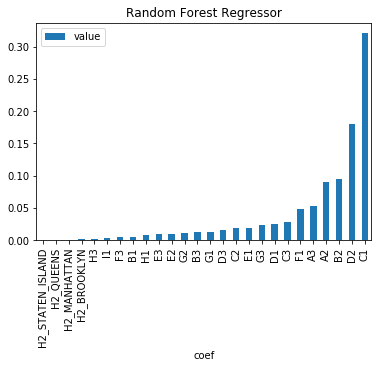

In [145]:
df1.plot(x='coef',kind='bar')
plt.title('Random Forest Regressor')